***
***
***

# BootCamp em Ciência de Dados 2 - Alura
Márcio Augusto Silva Gonçalves - marcius72@gmail.com - https://github.com/mago72
***
***

## Parte do Módulo 1 necessária ao Módulo 2
***
***

In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
%matplotlib inline

***
### Análise de gastos hospitalares por mês/ano de **ATENDIMENTO / INTERNAÇÃO** e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [3]:
import pandas as pd

In [4]:
dados_sus = pd.read_csv('https://raw.githubusercontent.com/mago72/BootCamp-DataScience-Alura/main/Dados/datasus_internacao.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

In [5]:
pd.options.display.float_format='{:.2f}'.format

In [6]:
colunas_validas=dados_sus.mean().index

In [7]:
colunas_validas = dados_sus.mean().index.tolist()   #transformando o índice em lista para poder manipular
colunas_validas.insert(0, "Unidade da Federação") # 0 é a posição onde entra a coluna unidade da federação do DataFrame original

In [8]:
validas = dados_sus[colunas_validas]

In [9]:
validas = validas.set_index("Unidade da Federação")

In [10]:
validas.T.head()   # Função T para transpor o índice para as colunas e poder imprimir o gráfico corretamente

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [11]:
validas = validas.drop("Total", axis=1)    ## A função drop retira a linha Total e o axis=1 indica que o total está como Linha (axis=0 indicaria como coluna, se fosse o caso) 

In [12]:
validas['Total'] = validas.sum(axis=1)  ### Aqui atribuiu-se a uma nova coluna 'Total' ao DF especificando os valores dela sendo a soma das linhas . O Total aparece no final a direita. A atribuição por soma funcionou pq tem 27 valores, igual as linhas do data frame e é a soma de cada linha. Se tem alguma linha faltando, não funcionaria.

In [13]:
validas.sort_values('Total', ascending=False).head() # Em ordem de maior para o menor gasto (se ascending True ou ausente por default então é do menor para o maior)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,41386533231.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,20418205467.78
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,14681341476.16
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12764274442.95
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,10337229379.18


In [14]:
ordenado_por_total = validas.sort_values('Total', ascending=False) 
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)

In [15]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [16]:
ordenado_por_total = ordenado_por_total / 1000000

In [17]:
mes_mais_recente = ordenado_por_total.columns[-1]   # -1 pega o primeiro mes do final para o começo, ou seja o último no caso Março de 2021
mes_mais_recente

'2021/Mar'

In [18]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           177.41
31 Minas Gerais         79.78
41 Paraná               43.48
43 Rio Grande do Sul    37.80
33 Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64

<AxesSubplot:xlabel='Unidade da Federação'>

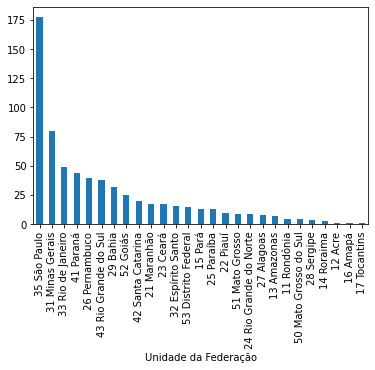

In [19]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)  # se usasse True ou mesmo nada o ordenamento seria ascendente do menor para o maior
gastos_do_mais_recente.plot(kind='bar')

## Módulo 2
Aprofundamento da análise dos dados financeiros do DataSUS
 - Tratamento, exploração e visualização de dados
 - Avance seus conhecimentos em Python e Pandas para analisar dados reais.
 - Crie gráficos estilizados com Seaborn
 - Aprenda como usar o pandas na manipulação dos seus dados.
 - Analise e explore os dados criando hipótese de forma analítica.
 - Crie visualizações e aprenda boas práticas.
 ***
 ***

### Aula 1 - Módulo 2 - Fontes externas, limpeza e manipulação de dados

***
#### Continuidade com a mesma base de dados de data/mês de atendimento/internação, importando-a via http do GitHub (vide importação do arquivo na Aula2 mod1 - modificando origem)


#### Trazendo novamente o gráfico final da Aula 5 mod.1:

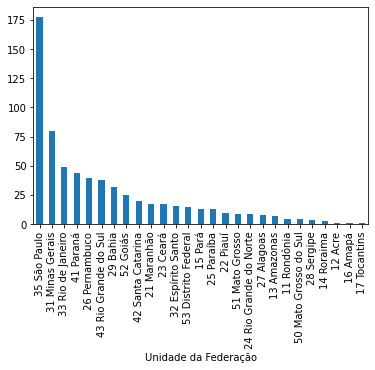

In [20]:
import matplotlib as mpl   # A função style parou de funcionar - Não funciona mais dentro de plt.style.use e sim agora direto dentro de mpl.style.use
import matplotlib.style

gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)  # se usasse True ou mesmo nada o ordenamento seria ascendente do menor para o maior
gastos_do_mais_recente.plot(kind='bar')
mpl.style.use('default')

#### Abaixo criar uma tabela de gastos proporcionais por Estado, onde poderá ser visto o % de cada um

In [21]:
gastos_do_mais_recente / gastos_do_mais_recente.sum()
# gastos_proporcionais.plot(kind='bar')

Unidade da Federação
35 São Paulo             0.27
31 Minas Gerais          0.12
33 Rio de Janeiro        0.08
41 Paraná                0.07
26 Pernambuco            0.06
43 Rio Grande do Sul     0.06
29 Bahia                 0.05
52 Goiás                 0.04
42 Santa Catarina        0.03
21 Maranhão              0.03
23 Ceará                 0.03
32 Espírito Santo        0.02
53 Distrito Federal      0.02
15 Pará                  0.02
25 Paraíba               0.02
22 Piauí                 0.01
51 Mato Grosso           0.01
24 Rio Grande do Norte   0.01
27 Alagoas               0.01
13 Amazonas              0.01
11 Rondônia              0.01
50 Mato Grosso do Sul    0.01
28 Sergipe               0.00
14 Roraima               0.00
12 Acre                  0.00
16 Amapá                 0.00
17 Tocantins             0.00
Name: 2021/Mar, dtype: float64

#### Vendo em um gráfico o % será da mesma forma do gráfico mais recente:

<AxesSubplot:xlabel='Unidade da Federação'>

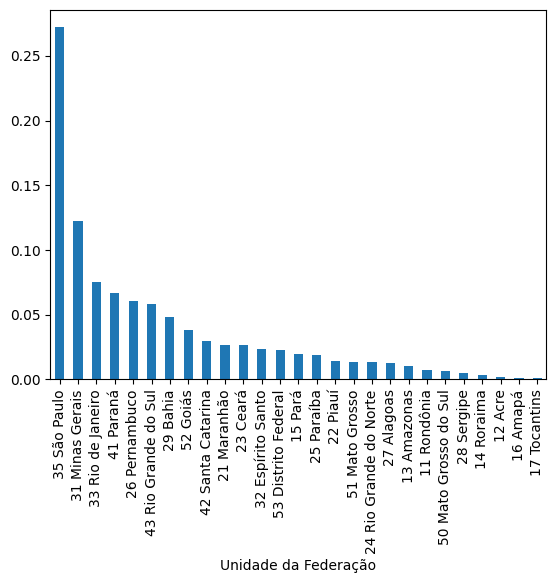

In [22]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

#### **Agora para melhor análise devemos usar a população brasileira para obter a porporção de gastos hospitalares por habitante**
*P.S. Já fiz uma solução nos desafios da Aula 5 mód.1, utilizando dados do IBGE do censo 2010 e da estimativa 2020, mas aqui será utilizado apenas o dado fixo da estimativa 2020

Em IBGE: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados foi baixado o arquivo da estimativa (link é diferente do que usei, arquivo tem outro formato, porém os dados de população são os mesmos).
Arquivo **.XLS** foi baixado e exportado para o GitHub da Alura:

Será usado a função de ler o excel

In [23]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Com o erro acima será instalado a dependencia de leitura: **xlrd** e rodar a leitura do excel novamente

In [24]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [25]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


#### A tabela acima poderá ser trabalhada, mas podemos pegar uma outra fonte de dados dessa tabela em página web: 

Do wikipedia em https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1 pode-se pegar esses mesmos dados de fonte do IBGE<br>
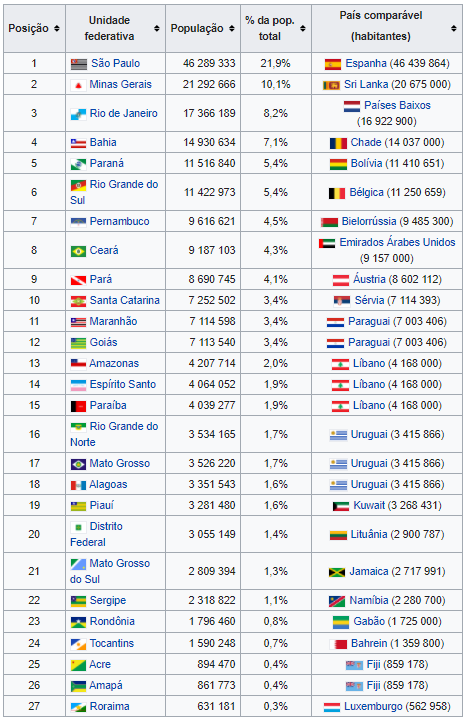

#### Agora **copiando e colando** a tabela aqui (deve-se usar Aspas Triplas para reconhecer os dados colados):

In [26]:
dados_da_populacao = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

#### Agora transformando em tabela estruturada usando a lib io no módulo StringIO:

In [27]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

pd.read_csv(dados_da_populacao_io, sep="\t")   # Lê como CSV e separado por TAB (/t)

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


#### Agora vamos investigar a tabela e transformá-la em um DataFrame denominado 'populacao':

In [28]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


#### Percebemos o seguinte problema:
- A primeira linha tem vários NaN e essa linha precisa ser eliminada com o dropna():

In [29]:
populacao = populacao.dropna()
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#### Agora: ter o nome das colunas 'Unidade federativa'	e 'População' como 'uf' e 'populacao' (duas formas: ou renomear ou CRIAR novas colunas com os nomes já padronizados - será feita essa última):

In [30]:
populacao["populacao"] = populacao["População"]
populacao["uf"] = populacao["Unidade federativa"]
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46 289 333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21 292 666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17 366 189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14 930 634,Bahia Bahia
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651),11 516 840,Paraná


In [31]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             27 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     object
 6   uf                  27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


#### Observa-se que a coluna 'populacao' é objeto porque há ESPAÇOS entre os números. Retirar os espaços com **'str.replace'** e determinar a coluna como INT usando 'astype':

In [32]:
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)   # o replace trocou o espaço vazio por nada, eliminando-o

In [33]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             27 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     int32 
 6   uf                  27 non-null     object
dtypes: int32(1), object(6)
memory usage: 1.6+ KB


#### Para terminar vamos reduzir o dataframe apenas com as colunas 'populacao' e 'uf' e setar o índice como 'uf':

In [34]:
populacao = populacao[['populacao', 'uf']].set_index('uf')
display(populacao.head())
display(populacao.info())   # o 'display' permite que o head e o info sejam visualizados no mesmo bloco, sem precisar usar duas linhas diferentes

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int32
dtypes: int32(1)
memory usage: 324.0+ bytes


None

#### O passo é juntar o DF do gasto do mês mais recente com o DF populacao
Para isso vamos investigar o head do gasto do mês mais recente e observar o seu índice:

In [35]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo        177.41
31 Minas Gerais      79.78
33 Rio de Janeiro    49.15
41 Paraná            43.48
26 Pernambuco        39.47
Name: 2021/Mar, dtype: float64

#### Para juntar (join) os índices tem que ser os mesmos e percebe-se que o índice do gasto_do_mais_recente começa com 2 números 1 espaço antes do nome do Estado. Vamos retirar isso com SLICE  de STR:

In [36]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo        177.41
Minas Gerais      79.78
Rio de Janeiro    49.15
Paraná            43.48
Pernambuco        39.47
Name: 2021/Mar, dtype: float64

#### Agora vamos tentar unir os DF populacao e gastos_do_mais_recente usando o índice do nome dos Estados que parece ser igual (mas não é...):

In [37]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2021/Mar
uf,,
São Paulo,46289333,NaN
Minas Gerais,21292666,NaN
Rio de Janeiro,17366189,NaN
Bahia Bahia,14930634,NaN
Paraná,11516840,NaN


Vejam que não funcionou - há NaN na coluna do mes mais recente, ao invés dos valores dos gastos, indicando que os índices não estão iguais.

#### Investigando os índices dos DFs que tentou unir-se com Join para tentar achar erros:

In [38]:
populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

#### Observa-se no índice de população que há ESPAÇO antes do nome dos Estados. Vamos retirá-los com a funçao STRIP de STR que elimina espaços no início e no final:

In [39]:
populacao.index = populacao.index.str.strip()
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

#### Nova tentativa de Join:

In [40]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia Bahia,14930634,NaN
Paraná,11516840,43.48
Rio Grande do Sul,11422973,37.80
Pernambuco,9616621,39.47
Ceará,9187103,17.17
Pará Pará,8690745,NaN


#### Observou-se acima que as linhas de Bahia e Pará continuam com NaN porque os nomes dos Estados estavam duplicados (ao copiar a tabela na wikipedia o nome veio junto pela função html de "alt" que estava ativa nesse estados na página. Para corrigir:

Criamos um laço para 'estado' relacionando-o ao índice do DF 'gastos...' que tem os nomes corretos. Em seguida usamos 'replace' para trocar o índice do DF 'populacao' para quaisquer nomes de estados duplicados (estado estado) apenas por um 'estado':

In [41]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

#### Agora com os índices iguais, novamente o JOIN para juntas os DFs em um novo chamado gastos_e_populacao_recente:

In [42]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia,14930634,31.31
Paraná,11516840,43.48
Rio Grande do Sul,11422973,37.80
Pernambuco,9616621,39.47
Ceará,9187103,17.17
Pará,8690745,13.07


***
***

### Desafios Aula 1 - Módulo 2
***
***

#### Desafio 1 Aula 1: Ler diretamente da página web o arquivo da tabela de população do wikipedia (html).

Vamos usar a função pd.read_html ():

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

 Erro ao tentar importar: ImportError: lxml not found, please install it . Instalado agora

In [44]:
pip install lxml  

Note: you may need to restart the kernel to use updated packages.


In [45]:
tabela_pop_estados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

Verificando o total de tabelas que foram trazidas:

In [46]:
print(f'Total tables: {len(tabela_pop_estados)}')   # o f no print junta dois comandos internos, no caso o no total... com o len...

Total tables: 5


ImportError: html5lib not found, please install it . html5lib instalado  // ImportError: BeautifulSoup4 (bs4) not found, please install it. Instalado

In [47]:
pip install html5lib   

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


Encontradas 5 tabelas na página html acima. Tentar estabelecer apenas a tabela de interesse com 'Match' de palavra ou expressão que só tenha na tabela de interesse:

In [49]:
tabela_pop_estados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o', match='Unidade federativa')

In [50]:
len(tabela_pop_estados)  # agora apemas 1 tabela veio

1

Testando a tabela importada da página da wikipedia:

In [51]:
tabela_pop_estados

[    Posição   Unidade federativa   População % da pop. total  \
 0         1            São Paulo  46 289 333           21,9%   
 1         2         Minas Gerais  21 292 666           10,1%   
 2         3       Rio de Janeiro  17 366 189            8,2%   
 3         4                Bahia  14 930 634            7,1%   
 4         5               Paraná  11 516 840            5,4%   
 5         6    Rio Grande do Sul  11 422 973            5,4%   
 6         7           Pernambuco   9 616 621            4,5%   
 7         8                Ceará   9 187 103            4,3%   
 8         9                 Pará   8 690 745            4,1%   
 9        10       Santa Catarina   7 252 502            3,4%   
 10       11             Maranhão   7 114 598            3,4%   
 11       12                Goiás   7 113 540            3,4%   
 12       13             Amazonas   4 207 714            2,0%   
 13       14       Espírito Santo   4 064 052            1,9%   
 14       15             

A tabela está correta. Agora transformar em DataFrame:

In [52]:
df_pop_estados = tabela_pop_estados[0]
df_pop_estados.info()
df_pop_estados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


A vantagem de pegar dados online é estarem sempre atualizados. A desvantagem é quando você não quer que mude e a página sai ou altera as informações. Aí se perde a fonte que servia.<br>
Para finalizar deve-se tratar os dados da tabela com População e % da pop total que estão como objeto para transformar em numeral. Fica para o desafio 4.

#### Desafio 02 - Aula 1: Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

Foi feito conforme reproduzção da aula: a eliminação de NAN com dropna; a padronização acrescentando novas colunas com os dados requeridos de outras; a transformação para tipo numérico coma os comandos da função STR (string) de strip e replace; e a padronização dos índices do dataframe usando o laço FOR do índice correto para transformar o índice com nomes duplicados do outro DF. Pode ser visto na AULA 1 acima a partir do passo **"Agora vamos investigar a tabela e transformá-la em um DataFrame denominado 'populacao':**

#### Desafio 03 - Aula 1 - Buscar na documentação alguns métodos envolvendo strings

Um artigo do próprio Guilherme da Alura, de nov/2018, para manipular STRINGS no pandas é bastante didático e pode ser visto em: https://www.alura.com.br/artigos/manipulacao-de-strings-no-pandas-lower-replace-startswith-e-contains<br>
Outro artigo que ajudou na resolução do Desafio 1 acima, além de ajudar a trazer a tabela direto da página HTML ensina a tratar as STRINGS que vem na tabela: https://pbpython.com/pandas-html-table.html<br>
Além disso a própria documentação do Python-Pandas para trabalhar com dados textuais com dezenas de funções pode ser visto em: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

#### Desafio 04 - Aula 1 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas **'pop_estados' e 'pop_e_gasto_mais_recente'.**
***
***

Nesse desafio será colocado como função a automatização da importação via webscrapping do DF da Wikipedia, a limpeza e preparação dos dados e o Join com os índices já organizados do DF dados_desejados (**gastos_do_mais_recente**)

In [53]:
def limpartratar_unir_popgastos (url_wiki, dados_desejados):

    # importando dado da url_wiki
    tabela_pop_estados = pd.read_html(url_wiki, match='Unidade federativa') # nome que identifica a tabela requerida na URL_wiki)
    # criando o dataframe a partir da posição 0
    pop_estados = tabela_pop_estados[0]
    # limpando e tratando
    pop_estados["populacao"] = pop_estados["População"].str.replace(" ", "").astype(int)
    pop_estados["uf"] = pop_estados["Unidade federativa"]
    pop_estados = pop_estados[["populacao", "uf"]].set_index("uf")
    # agora unficando com join a tabela df_pop_estados e os dados_mes_mais_recente (que é a DF: gastos_do_mais_recente)
    # o dados_desejados será o DF gastos_do_mais_recente que já teve o índice tratado apenas com os nomes dos Estados na Aula 1, portanto está pronto para o join
    pop_e_gasto_mais_recente = pop_estados.join(dados_desejados)
    #agora a função retorna as tabelas: pop_estados e pop_e_gasto_mais_recente
    return pop_estados, pop_e_gasto_mais_recente
    

Especificando a url e o DF de gastos mais recentes:

In [54]:
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
dados_desejados = gastos_do_mais_recente

Rodando a função para retornar as 2 tabelas na ordem: pop_estados / pop_e_gasto_mais_recente

In [55]:
limpartratar_unir_popgastos (url_wiki, dados_desejados)

(                     populacao
 uf                            
 São Paulo             46289333
 Minas Gerais          21292666
 Rio de Janeiro        17366189
 Bahia                 14930634
 Paraná                11516840
 Rio Grande do Sul     11422973
 Pernambuco             9616621
 Ceará                  9187103
 Pará                   8690745
 Santa Catarina         7252502
 Maranhão               7114598
 Goiás                  7113540
 Amazonas               4207714
 Espírito Santo         4064052
 Paraíba                4039277
 Rio Grande do Norte    3534165
 Mato Grosso            3526220
 Alagoas                3351543
 Piauí                  3281480
 Distrito Federal       3055149
 Mato Grosso do Sul     2809394
 Sergipe                2318822
 Rondônia               1796460
 Tocantins              1590248
 Acre                    894470
 Amapá                   861773
 Roraima                 631181,
                      populacao  2021/Mar
 uf                          